# Gene prediction targets - FSEOF

In [65]:
%run 01-model.ipynb
import numpy as np

## Intro to gene prediction targets

Strain optimization is known to be tedious and expensive but with new computational methods in metabolic engineering we can predict targets for gene up/down regulation. Normally, the production of a secondary metabolite and growth are mutually exclusive. Rather than knocking out genes which can reduce growth and fitness, up/down regulation can be a beneficial strategy. Here, we computationally will show that it is possible to find targets that could be up/down regulated benefiting the flux towards the production of Psilocybin. The method Flux variability scanning based on enforced objective flux(FVSEOF) is useful for identifying gene amplification targets (J.M. Park et al 2012). This method scans fluxes in artificially imposed objective fluxes. The hope of this analysis is that these targets are novel but also that previous targets are found to validate the method. 

Below, we're using the computer aided metabolic engineering and optimization(CAMEO) tool to run an Flux variability scanning based on enforced objective flux. 

In [66]:
from cameo.strain_design.deterministic.flux_variability_based import FSEOF
fseof = FSEOF(model)
result = fseof.run(target = model.reactions.psiM)
df = result.data_frame

After running the analysis we can plot the predicted targets that shows an increase or decrease in flux when the target is set to the last step of the psilocybin pathway. 

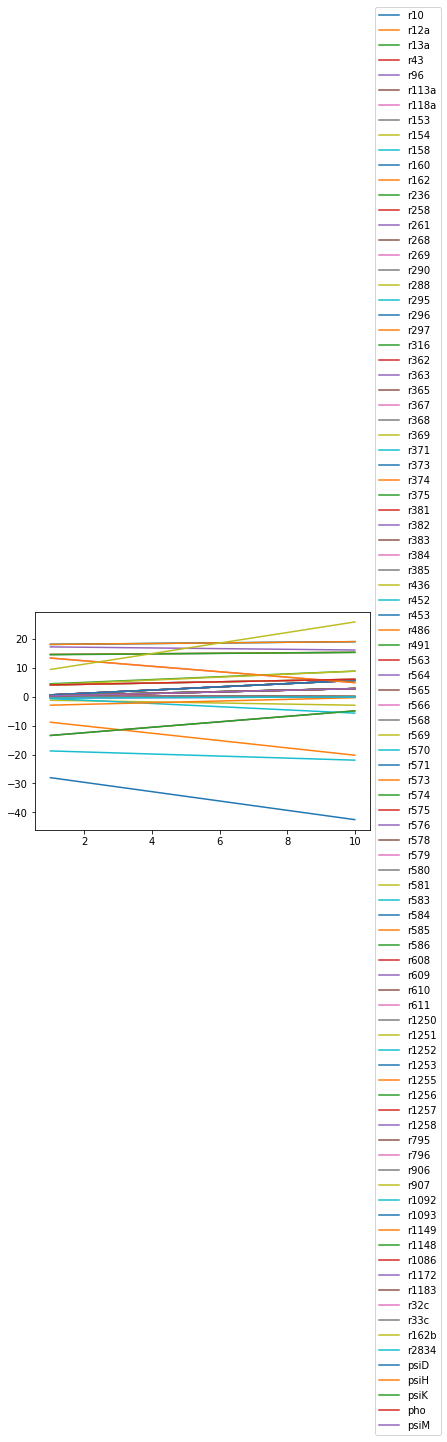

In [67]:
from matplotlib import pyplot as plt
result.data_frame.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

To get a better overview of the results we can sort the values and remove all the ones that have a flux change of 0.0

In [68]:
# sorting the dataframe
df= df.sort_values([1], ascending = False)
 
from pytest import approx
# removing genes from dataframe 
removed_zero = (df != approx(0.0)).all(axis=1)
df = df.loc[removed_zero]
df.head()

,1,2,3,4,5,6,7,8,9,10
r295,18.117923,18.223502,18.329082,18.434661,18.540241,18.645820,18.751400,18.856979,18.962559,19.068138
r297,18.117923,18.223502,18.329082,18.434661,18.540241,18.645820,18.751400,18.856979,18.962559,19.068138
r296,18.117923,18.223502,18.329082,18.434661,18.540241,18.645820,18.751400,18.856979,18.962559,19.068138
r261,17.252347,17.133025,17.013703,16.894381,16.775058,16.655736,16.536414,16.417092,16.297770,16.178448
r12a,14.652984,14.733254,14.813525,14.893796,14.974067,15.054338,15.134608,15.214879,15.295150,15.375421


These results show 10 the enzymes that show the highest increase or decrease in flux. The whole dataframe consistes of 95 rows which means 95 reactions have a change of flux. 

To get a better overview of the changes in flux and genes we can plot the in the following way. 

Text(0.5, 1.0, 'Flux scanning based on Enforced Objective Flux')

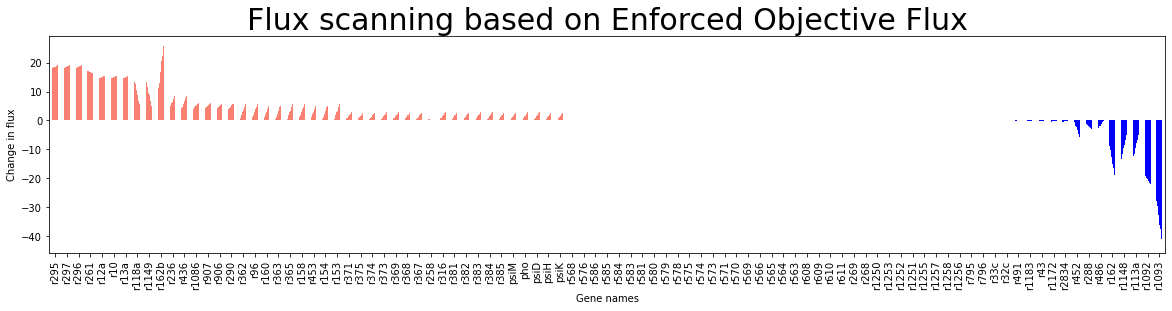

In [69]:
def bar_color(df,color1,color2):
    return np.where(df.values >=0,color1,color2).T

fig = df.plot(legend=None, kind='bar', color=bar_color(df,'salmon','blue'),figsize=(20, 4), grid =False);
fig.set_ylabel('Change in flux')
fig.set_xlabel('Gene names')
fig.set_title('Flux scanning based on Enforced Objective Flux', size=30)

#### We want to see what the relative change is for the different fluxes. This can be calculated like this: R = (B-A) / B +1


In [70]:
df['relative_change_in_flux'] = (df[10]-df[1])/df[10] +1

#### If we look at the reactions that have a higher relative_change_in_flux than 80% we can find target rections. 

In [71]:
target_reactions_df = df[df['relative_change_in_flux'] > 1.8]

In [72]:
target_reactions_df

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
r362,0.665748,1.220921,1.776093,2.331266,2.886439,3.441612,3.996785,4.551958,5.107130,5.662303,1.882425
r96,0.665748,1.220921,1.776093,2.331266,2.886439,3.441612,3.996785,4.551958,5.107130,5.662303,1.882425
r160,0.642129,1.199638,1.757147,2.314656,2.872164,3.429673,3.987182,4.544690,5.102199,5.659708,1.886544
r363,0.642129,1.199638,1.757147,2.314656,2.872164,3.429673,3.987182,4.544690,5.102199,5.659708,1.886544
r365,0.642129,1.199638,1.757147,2.314656,2.872164,3.429673,3.987182,4.544690,5.102199,5.659708,1.886544
r158,0.642129,1.199638,1.757147,2.314656,2.872164,3.429673,3.987182,4.544690,5.102199,5.659708,1.886544
r453,0.642129,1.199638,1.757147,2.314656,2.872164,3.429673,3.987182,4.544690,5.102199,5.659708,1.886544
r154,0.633577,1.191931,1.750286,2.308641,2.866995,3.425350,3.983704,4.542059,5.100413,5.658768,1.888036
r153,0.633577,1.191931,1.750286,2.308641,2.866995,3.425350,3.983704,4.542059,5.100413,5.658768,1.888036
r371,0.427196,0.695454,0.963712,1.231969,1.500227,1.768485,2.036743,2.305001,2.573259,2.841517,1.849659


In [73]:
df = target_reactions_df.drop(labels='relative_change_in_flux', axis=1)

Text(0.5, 1.0, 'Reactions with a relative change in Flux > 80%')

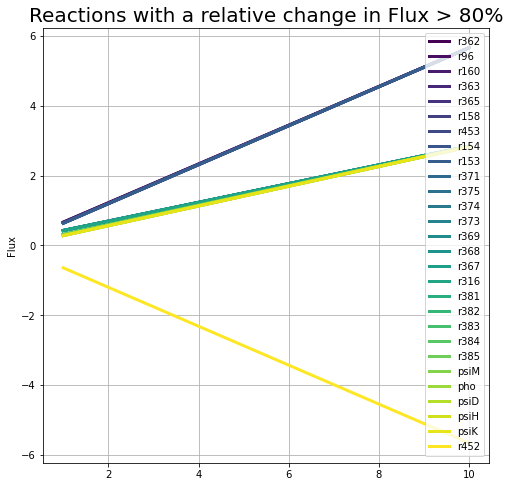

In [74]:
fig = df.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig.set_ylabel('Flux')
fig.set_title('Reactions with a relative change in Flux > 80%', size=20)

What we see here is that many of the reactions have the same relative change in flux. This is probably due to them being linked to eachother in the model.

In [77]:
#lowest flux reactions
target_reactions_df.tail()

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
pho,0.282562,0.565125,0.847687,1.130249,1.412811,1.695374,1.977936,2.260498,2.543061,2.825623,1.900000
psiD,0.282562,0.565125,0.847687,1.130249,1.412811,1.695374,1.977936,2.260498,2.543061,2.825623,1.900000
psiH,0.282562,0.565125,0.847687,1.130249,1.412811,1.695374,1.977936,2.260498,2.543061,2.825623,1.900000
psiK,0.282562,0.565125,0.847687,1.130249,1.412811,1.695374,1.977936,2.260498,2.543061,2.825623,1.900000
r452,-0.642129,-1.199638,-1.757147,-2.314656,-2.872164,-3.429673,-3.987182,-4.544690,-5.102199,-5.659708,1.886544


In [78]:
#higest flux reactions
target_reactions_df.head()

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
r362,0.665748,1.220921,1.776093,2.331266,2.886439,3.441612,3.996785,4.551958,5.107130,5.662303,1.882425
r96,0.665748,1.220921,1.776093,2.331266,2.886439,3.441612,3.996785,4.551958,5.107130,5.662303,1.882425
r160,0.642129,1.199638,1.757147,2.314656,2.872164,3.429673,3.987182,4.544690,5.102199,5.659708,1.886544
r363,0.642129,1.199638,1.757147,2.314656,2.872164,3.429673,3.987182,4.544690,5.102199,5.659708,1.886544
r365,0.642129,1.199638,1.757147,2.314656,2.872164,3.429673,3.987182,4.544690,5.102199,5.659708,1.886544


#### Top 10 targets for upregulation: 

r362 = Methionine synthase

r96 = Methylenetetrahydrofolate reductase (NADPH)

r16 = Ribitol dehydrogenase 

r363 = S-adenosylmethionine synthetase

r365 = Adenosylhomocysteinase (S-adenosyl-l-homocysteine hydrolase)

r158 = D-Ribose reductase

r453 = Purine nucleoside hydrolase

r154 = Xylulose kinase

r153 = D-arabitol dehydrogenase

r371 = Quinate 5-dehydrogenase




#### Best target for downregulation:

r452 = AMP nucleosidase

### Summary
From the FSOEV analysis we have found targets with a relative change in flux of more than 80%. Interestingly, a pattern emerges from these enzymes which is that a large majority (6/10) are reductases or dehydrogenases involved in redox reactions. Furthermore, the enzymes whith the highest relative flux change is the enzymes pho, psiD, psiH, psiK (approximetly 90%) which is not suprising since they catalyzes the psilocybin pathway. Furthermore, it has to be noted that if the relative flux change is set lower we will get enzymes in which the flux is higher in total but not relatively - this could also be interesting to look at for further studies. 

## References

1. Park JM, Park HM, Kim WJ, Kim HU, Kim TY, Lee SY. Flux variability scanning based on enforced objective flux for identifying gene amplification targets. BMC Systems Biology. 2012;6(1):106. doi:10.1186/1752-0509-6-106

